<a href="https://colab.research.google.com/github/LucjanSakowicz/data-science-projects/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Load data

In [113]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Print basic train data info

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Print first few rows.

In [115]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Name column seems widely unorganized, we'll try to fix that.

First will extract part before coma, which looks like surname.

In [116]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [117]:
df_train[['Surname', 'FirstNames']] = df_train['Name'].str.split(',', expand=True)
df_train[['Surname', 'FirstNames']]

,Surname,FirstNames
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


Split First names into title, Names and others.

In [118]:
df_train[['Title', 'Names', 'Other']] = df_train['FirstNames'].str.split('.', expand=True)
df_train.drop(columns=['FirstNames', 'Name'], inplace=True)

In [119]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Other
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None


What exactly is in Other column?

In [120]:
df_train['Other'].value_counts()

 Barrett)    1
Name: Other, dtype: int64

In [121]:
df_train[df_train['Other'].isna() == False]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Other
513,514,1,1,female,54.0,1,0,PC 17603,59.4,NaN,C,Rothschild,Mrs,Martin (Elizabeth L,Barrett)


Remove non-required column

In [122]:
df_train.iloc[513, -2] = df_train.iloc[513, -2] + df_train.iloc[513,-1]
df_train.drop(columns='Other', inplace=True)
print(df_train)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked    Surname  Title  \
0           A/5 21171   7.2500   NaN        S     Braund     Mr   
1            PC 17599  71.2833   C85        C    Cumings    Mrs   
2    S

Trim strings from blank characters

In [123]:
df_train[['Surname', 'Title', 'Names']] = df_train[['Surname', 'Title', 'Names']].apply(lambda x: x.str.strip())

In [124]:
df_train['Surname'].value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Surname, Length: 667, dtype: int64

Let's make bar chart for better visualisation of surnames

In [125]:
px.bar(x=df_train['Surname'].value_counts().index, y=df_train['Surname'].value_counts(), template='plotly_dark', title='Surname occurrences',
       width=950, color_discrete_sequence=['#03fcb5'])

Some of the Surnames looks like have more than one word and some have characters which are not letters, let's take a look

In [126]:
temp_surname = df_train['Surname'].str.split(' ', expand=True).apply(lambda x: x.str.strip())
print(temp_surname)

             0     1     2
0       Braund  None  None
1      Cumings  None  None
2    Heikkinen  None  None
3     Futrelle  None  None
4        Allen  None  None
..         ...   ...   ...
886   Montvila  None  None
887     Graham  None  None
888   Johnston  None  None
889       Behr  None  None
890     Dooley  None  None

[891 rows x 3 columns]


In [127]:
temp_surname[temp_surname[2].isna() == False]

,0,1,2
170,Van,der,hoef
307,Penasco,y,Castellana
505,Penasco,y,Castellana
547,Padro,y,Manent
866,Duran,y,More


"Vad der hoef" can be loosely translated "from hoef", so it should be treated as surname in our case

The two surnames may be connected by the letter "y" which means "and." For example, Juan Gomez y Conde has Juan as a first name, Gomez as the surname of the father, and Conde as the surname of the mother. Let's check if any of these exist in "Surname" column

In [128]:
y_names = temp_surname[(temp_surname[2].isna() == False) & (temp_surname[1] == 'y')]
df_train[df_train['Surname'] == y_names[2].str]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names


Let's check another column for values not equal None

In [129]:
temp_surname[temp_surname[1].isna() == False]

,0,1,2
18,Vander,Planke,None
38,Vander,Planke,None
153,van,Billiard,None
170,Van,der,hoef
200,Vande,Walle,None
282,de,Pelsmaeker,None
286,de,Mulder,None
307,Penasco,y,Castellana
333,Vander,Planke,None
355,Vanden,Steen,None


Again, let's check to be sure that there isn't person with Surname of a second column

In [130]:
y_names = temp_surname[(temp_surname[1].isna() == False)]
df_train[df_train['Surname'] == y_names[1].str]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names


Let's check non letter values

In [131]:
df_train[~df_train['Surname'].str.isalpha()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names
18,19,0,3,female,31.0,1,0,345763,18.0000,NaN,S,Vander Planke,Mrs,Julius (Emelia Maria Vandemoortele)
28,29,1,3,female,NaN,0,0,330959,7.8792,NaN,Q,O'Dwyer,Miss,"Ellen ""Nellie"""
38,39,0,3,female,18.0,2,0,345764,18.0000,NaN,S,Vander Planke,Miss,Augusta Maria
39,40,1,3,female,14.0,1,0,2651,11.2417,NaN,C,Nicola-Yarred,Miss,Jamila
47,48,1,3,female,NaN,0,0,14311,7.7500,NaN,Q,O'Driscoll,Miss,Bridget
49,50,0,3,female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs,Josef (Josefine Franchi)
125,126,1,3,male,12.0,1,0,2651,11.2417,NaN,C,Nicola-Yarred,Master,Elias
153,154,0,3,male,40.5,0,2,A/5. 851,14.5000,NaN,S,van Billiard,Mr,Austin Blyler
170,171,0,1,male,61.0,0,0,111240,33.5000,B19,S,Van der hoef,Mr,Wyckoff
184,185,1,3,female,4.0,0,2,315153,22.0250,NaN,S,Kink-Heilmann,Miss,Luise Gretchen


Let's check dashed surnames which might be surname given at marriage

In [132]:
y_names = df_train[df_train['Surname'].str.contains("-")]['Surname'].str.split('-', expand=True).apply(lambda x: x.str.strip())
y_names

,0,1
39,Nicola,Yarred
49,Arnold,Franchi
125,Nicola,Yarred
184,Kink,Heilmann
192,Andersen,Jensen
351,Williams,Lambert
353,Arnold,Franchi
430,Bjornstrom,Steffansson
444,Johannesen,Bratthammer
587,Frolicher,Stehli


Check if any other person has such surname

In [133]:
df_train[df_train['Surname'] == y_names[0].str]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names


In [134]:
df_train[df_train['Surname'] == y_names[1].str]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names


It seems that nothing else can be done for Surname, let's move to Title column

In [135]:
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [136]:
px.bar(x=df_train['Title'].value_counts().index, y=df_train['Title'].value_counts(), template='plotly_dark', title='Title occurrences',
       width=950, color_discrete_sequence=['#03fcb5'])

Ovewhelming part of titles belong to 'Mr', 'Miss', 'Mrs' and 'Master' class. Let's check how big is this part

In [137]:
len(df_train[(df_train['Title'] == 'Mr') | (df_train['Title'] == 'Miss') | (df_train['Title'] == 'Mrs') | (df_train['Title'] == 'Master')]) / len(df_train)

0.9696969696969697

Let's check what is percentage of survival based on most common titles

In [138]:
print(f"Mr:   {len(df_train[(df_train['Title'] == 'Mr') & df_train['Survived'] == 1.0]) / len(df_train[(df_train['Title'] == 'Mr') & ~df_train['Survived'].isna()]) }")
print(f"Miss:   {len(df_train[(df_train['Title'] == 'Miss') & df_train['Survived'] == 1.0]) / len(df_train[(df_train['Title'] == 'Miss') & ~df_train['Survived'].isna()]) }")
print(f"Mrs:   {len(df_train[(df_train['Title'] == 'Mrs') & df_train['Survived'] == 1.0]) / len(df_train[(df_train['Title'] == 'Mrs') & ~df_train['Survived'].isna()]) }")
print(f"Master:   {len(df_train[(df_train['Title'] == 'Master') & df_train['Survived'] == 1.0]) / len(df_train[(df_train['Title'] == 'Master') & ~df_train['Survived'].isna()]) }")

print(f"Percentage of Mr and Masters:   {len(df_train[(df_train['Title'] == 'Mr') | (df_train['Title'] == 'Master')]) / len(df_train) }")

Mr:   0.15667311411992263
Miss:   0.6978021978021978
Mrs:   0.792
Master:   0.575
Percentage of Mr and Masters:   0.6251402918069585


It seems that Females had much higher chance of survival, even tough man were over 65% of passengers. Let's keep that in mind for later.

Check if there might be Surnames hidden in the Names column which might be related

In [139]:
df_train['Names']

0                                Owen Harris
1      John Bradley (Florence Briggs Thayer)
2                                      Laina
3              Jacques Heath (Lily May Peel)
4                              William Henry
                       ...                  
886                                   Juozas
887                           Margaret Edith
888                 Catherine Helen "Carrie"
889                              Karl Howell
890                                  Patrick
Name: Names, Length: 891, dtype: object

In [140]:
names = df_train['Names']\
.apply(lambda x: x.replace("(", ""))\
.apply(lambda x: x.replace(")", ""))\
.apply(lambda x: x.replace('"', ""))\
.str.split(' ', expand=True)\
.apply(lambda x: x.str.strip())
print(names)

             0        1         2       3       4     5     6     7     8  \
0         Owen   Harris      None    None    None  None  None  None  None   
1         John  Bradley  Florence  Briggs  Thayer  None  None  None  None   
2        Laina     None      None    None    None  None  None  None  None   
3      Jacques    Heath      Lily     May    Peel  None  None  None  None   
4      William    Henry      None    None    None  None  None  None  None   
..         ...      ...       ...     ...     ...   ...   ...   ...   ...   
886     Juozas     None      None    None    None  None  None  None  None   
887   Margaret    Edith      None    None    None  None  None  None  None   
888  Catherine    Helen    Carrie    None    None  None  None  None  None   
889       Karl   Howell      None    None    None  None  None  None  None   
890    Patrick     None      None    None    None  None  None  None  None   

        9  
0    None  
1    None  
2    None  
3    None  
4    None  
.. 

In [141]:
exist = names.isin(df_train['Surname']).any(1)
print(exist[exist == True])

427    True
dtype: bool


<ipython-input-141-62a390d50a49>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.



In [142]:
df_train.iloc[427, :]

PassengerId                                                  428
Survived                                                       1
Pclass                                                         2
Sex                                                       female
Age                                                         19.0
SibSp                                                          0
Parch                                                          0
Ticket                                                    250655
Fare                                                        26.0
Cabin                                                        NaN
Embarked                                                       S
Surname                                                 Phillips
Title                                                       Miss
Names          Kate Florence ("Mrs Kate Louise Phillips Marsh...
Name: 427, dtype: object

In [143]:
names.iloc[427, :]

0        Kate
1    Florence
2         Mrs
3        Kate
4      Louise
5    Phillips
6    Marshall
7        None
8        None
9        None
Name: 427, dtype: object

It seems like nothing worthy hides in Names. Let's crosscheck Surnames with SibSp and Cabin to check if all related passengers were in the same cabin

In [144]:
multi_occurr_surnames_without_sibsp = df_train[(df_train['Surname'].isin(df_train['Surname'].value_counts().loc[lambda x: x > 1].index.to_list()))]\
         .groupby('Surname')\
         .sum()\
         .loc[lambda x: x['SibSp'] > 0]\
         .sort_values(by='Surname').index.to_list()

<ipython-input-144-13575f064f2d>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [145]:
non_compliant_cabin_surnames = df_train[(df_train['Surname'].isin(multi_occurr_surnames_without_sibsp))]\
         .groupby('Surname')['Cabin'].nunique()
non_compliant_cabin_surnames = non_compliant_cabin_surnames.index[non_compliant_cabin_surnames.gt(1)].tolist()
non_compliant_cabin_surnames

['Andrews', 'Brown', 'Duff Gordon', 'Hays', 'Newell', 'Taussig', 'Thayer']

In [146]:
df_train[df_train['Surname'].isin(non_compliant_cabin_surnames)].sort_values(by='Surname')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names
275,276,1,1,female,63.0,1,0,13502,77.9583,D7,S,Andrews,Miss,Kornelia Theodosia
806,807,0,1,male,39.0,0,0,112050,0.0000,A36,S,Andrews,Mr,Thomas Jr
194,195,1,1,female,44.0,0,0,PC 17610,27.7208,B4,C,Brown,Mrs,James Joseph (Margaret Tobin)
684,685,0,2,male,60.0,1,1,29750,39.0000,NaN,S,Brown,Mr,Thomas William Solomon
670,671,1,2,female,40.0,1,1,29750,39.0000,NaN,S,Brown,Mrs,Thomas William Solomon (Elizabeth Catherine Ford)
345,346,1,2,female,24.0,0,0,248733,13.0000,F33,S,Brown,Miss,"Amelia ""Mildred"""
599,600,1,1,male,49.0,1,0,PC 17485,56.9292,A20,C,Duff Gordon,Sir,"Cosmo Edmund (""Mr Morgan"")"
556,557,1,1,female,48.0,1,0,11755,39.6000,A16,C,Duff Gordon,Lady,"(Lucille Christiana Sutherland) (""Mrs Morgan"")"
820,821,1,1,female,52.0,1,1,12749,93.5000,B69,S,Hays,Mrs,Charles Melville (Clara Jennings Gregg)
310,311,1,1,female,24.0,0,0,11767,83.1583,C54,C,Hays,Miss,Margaret Bechstein


Again, it seems like nothing interesting here - it seems that there are no people who are related but have no cabin added.

Let's look at cabin itself

In [147]:
px.bar(x=df_train['Cabin'].value_counts().index, y=df_train['Cabin'].value_counts(), template='plotly_dark', title='Cabin occupancy',
       width=950, color_discrete_sequence=['#03fcb5'])

According to https://titanic.fandom.com/wiki/Category:Decks first letter in Cabin column corresponds to deck. Let's make new feature out of that.

In [148]:
df_train['Deck'] = df_train[df_train['Cabin'].isna()==False]['Cabin'].str.replace("\d+", "").str.replace(" ", "")
df_train[df_train['Deck'].isna()==False]

<ipython-input-148-437524b01db3>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),C
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),C
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,E
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,Marguerite Rut,G
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Miss,Elizabeth,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,Beckwith,Mrs,Richard Leonard (Sallie Monypeny),D
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Carlsson,Mr,Frans Olof,BBB
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,Potter,Mrs,Thomas Jr (Lily Alexenia Wilson),C
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,B


Due to the fact that multiple decks might be present, let's investigate that

In [150]:
df_train[(df_train['Deck'].isna()==False) & (df_train['Deck'].str.len() > 1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
27,28,0,1,male,19.00,3,2,19950,263.0000,C23 C25 C27,S,Fortune,Mr,Charles Alexander,CCC
75,76,0,3,male,25.00,0,0,348123,7.6500,F G73,S,Moen,Mr,Sigurd Hansen,FG
88,89,1,1,female,23.00,3,2,19950,263.0000,C23 C25 C27,S,Fortune,Miss,Mabel Helen,CCC
97,98,1,1,male,23.00,0,1,PC 17759,63.3583,D10 D12,C,Greenfield,Mr,William Bertram,DD
118,119,0,1,male,24.00,0,1,PC 17558,247.5208,B58 B60,C,Baxter,Mr,Quigg Edmond,BB
128,129,1,3,female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,FE
297,298,0,1,female,2.00,1,2,113781,151.5500,C22 C26,S,Allison,Miss,Helen Loraine,CC
299,300,1,1,female,50.00,0,1,PC 17558,247.5208,B58 B60,C,Baxter,Mrs,James (Helene DeLaudeniere Chaput),BB
305,306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S,Allison,Master,Hudson Trevor,CC
311,312,1,1,female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Ryerson,Miss,Emily Borie,BBBB


In [151]:
df_train['Deck'] = df_train[(df_train['Deck'].isna()==False)]['Deck'].apply(lambda x: set(x))
df_train[df_train['Deck'].isna()==False]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),{C}
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),{C}
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,{E}
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,Marguerite Rut,{G}
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Miss,Elizabeth,{C}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,Beckwith,Mrs,Richard Leonard (Sallie Monypeny),{D}
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Carlsson,Mr,Frans Olof,{B}
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,Potter,Mrs,Thomas Jr (Lily Alexenia Wilson),{C}
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,{B}


In [152]:
df_train[(df_train['Deck'].isna()==False) & (df_train['Deck'].str.len() > 1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
75,76,0,3,male,25.0,0,0,348123,7.6500,F G73,S,Moen,Mr,Sigurd Hansen,"{G, F}"
128,129,1,3,female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,"{E, F}"
699,700,0,3,male,42.0,0,0,348121,7.6500,F G63,S,Humblen,Mr,Adolf Mathias Nicolai Olsen,"{G, F}"
715,716,0,3,male,19.0,0,0,348124,7.6500,F G73,S,Soholt,Mr,Peter Andreas Lauritz Andersen,"{G, F}"


According to wiki above, all of these belong to deck F with section G and E accordingly.

In [153]:
df_train.iloc[[75, 128, 699, 715], -1] = [{'F'}, {'F'}, {'F'}, {'F'}]
df_train.iloc[[75, 128, 699, 715], :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
75,76,0,3,male,25.0,0,0,348123,7.6500,F G73,S,Moen,Mr,Sigurd Hansen,{F}
128,129,1,3,female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,Anna,{F}
699,700,0,3,male,42.0,0,0,348121,7.6500,F G63,S,Humblen,Mr,Adolf Mathias Nicolai Olsen,{F}
715,716,0,3,male,19.0,0,0,348124,7.6500,F G73,S,Soholt,Mr,Peter Andreas Lauritz Andersen,{F}


Convert new column from set to string

In [154]:
df_train['Deck'] = df_train[(df_train['Deck'].isna()==False)]['Deck'].apply(lambda x:x.pop())
df_train[(df_train['Deck'].isna()==False)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),C
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),C
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,E
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,Marguerite Rut,G
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Miss,Elizabeth,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,Beckwith,Mrs,Richard Leonard (Sallie Monypeny),D
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Carlsson,Mr,Frans Olof,B
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,Potter,Mrs,Thomas Jr (Lily Alexenia Wilson),C
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,B


Let's check how Deck is related to Survival

<Axes: xlabel='Deck', ylabel='Count'>

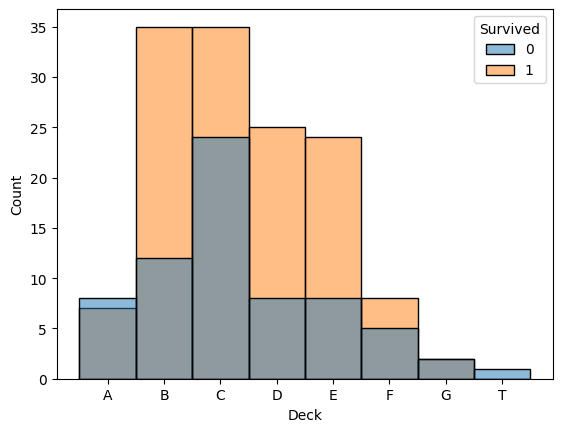

In [162]:
sns.histplot(data=df_train[(df_train['Deck'].isna()==False)].sort_values(by='Deck'), x='Deck', hue='Survived')

The result is very intersting! It seems that passengers from decks B, D and E had much higher chance of survival than passengers from decks A, G, T. Passengers on deck C have slightly higher chance of survival.

In [175]:
len(df_train[(df_train['Deck'] == 'C') & (df_train['Survived'] == 1)]) / len(df_train[(df_train['Deck'] == 'C')])

0.5932203389830508

In [177]:
df_train[df_train['Deck'].isna() == False]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),C
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),C
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr,Timothy J,E
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,Marguerite Rut,G
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Miss,Elizabeth,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,Beckwith,Mrs,Richard Leonard (Sallie Monypeny),D
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Carlsson,Mr,Frans Olof,B
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,Potter,Mrs,Thomas Jr (Lily Alexenia Wilson),C
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,B


However there is an issue - there is only 204 rows with filled Cabins! If we want to use this feature, we need to devlop strategy for filling missing cabin data. Let's investigate Ticket column first.

In [180]:
df_train[df_train['Ticket'].isna() == True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck


All of rows have Ticket column filled, it looks promising, let's look at duplicates.

In [210]:
ticket_list = sorted(df_train[df_train['Cabin'].isna() == False]['Ticket'].unique())
ticket_list

['110152',
 '110413',
 '110465',
 '110564',
 '110813',
 '111240',
 '111320',
 '111361',
 '111369',
 '112050',
 '112053',
 '112058',
 '112059',
 '112277',
 '113028',
 '113043',
 '113050',
 '113051',
 '113055',
 '113056',
 '113501',
 '113503',
 '113505',
 '113509',
 '113510',
 '113514',
 '113572',
 '113760',
 '113767',
 '113773',
 '113776',
 '113781',
 '113783',
 '113784',
 '113786',
 '113787',
 '113788',
 '113803',
 '113806',
 '11751',
 '11752',
 '11753',
 '11755',
 '11765',
 '11767',
 '11769',
 '11771',
 '11774',
 '11813',
 '11967',
 '12749',
 '13049',
 '13213',
 '13214',
 '13502',
 '13507',
 '13509',
 '13567',
 '13568',
 '16966',
 '16988',
 '17421',
 '17453',
 '17463',
 '17464',
 '17465',
 '17466',
 '17474',
 '17764',
 '19877',
 '19928',
 '19943',
 '19947',
 '19950',
 '19952',
 '19988',
 '19996',
 '226593',
 '230080',
 '230136',
 '24160',
 '248698',
 '248733',
 '2668',
 '27042',
 '27267',
 '28551',
 '33638',
 '34218',
 '347054',
 '348121',
 '348123',
 '348124',
 '35273',
 '35281',
 '3

In [218]:
tickets_without_cabin = df_train[(df_train['Ticket'].isin(ticket_list)) & df_train['Cabin'].isna() == True].groupby('Ticket')['Cabin'].unique().index.to_list()
tickets_without_cabin

['113781',
 '17421',
 '19877',
 '2668',
 '36928',
 'PC 17755',
 'PC 17757',
 'PC 17760',
 'PC 17761',
 'S.O./P.P. 3']

In [221]:
df_train[df_train['Ticket'].isin(tickets_without_cabin)].sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,Names,Deck
708,709,1,1,female,22.00,0,0,113781,151.5500,NaN,S,Cleaver,Miss,Alice,NaN
297,298,0,1,female,2.00,1,2,113781,151.5500,C22 C26,S,Allison,Miss,Helen Loraine,C
305,306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S,Allison,Master,Hudson Trevor,C
498,499,0,1,female,25.00,1,2,113781,151.5500,C22 C26,S,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),C
306,307,1,1,female,NaN,0,0,17421,110.8833,NaN,C,Fleming,Miss,Margaret,NaN
698,699,0,1,male,49.00,1,1,17421,110.8833,C68,C,Thayer,Mr,John Borland,C
581,582,1,1,female,39.00,1,1,17421,110.8833,C68,C,Thayer,Mrs,John Borland (Marian Longstreth Morris),C
550,551,1,1,male,17.00,0,2,17421,110.8833,C70,C,Thayer,Mr,John Borland Jr,C
741,742,0,1,male,36.00,1,0,19877,78.8500,C46,S,Cavendish,Mr,Tyrell William,C
290,291,1,1,female,26.00,0,0,19877,78.8500,NaN,S,Barber,Miss,"Ellen ""Nellie""",NaN


As we can see, there are people who definetely travelled together but have no cabin filled! We should not fill cabin since it's impossible to determine if they were traveling in the same one, bu we can with high probability assume the did travel on the same deck - so we will fill this data accordingly.